In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from numpy import random

import scipy.stats as stats

In [2]:
from sklearn.preprocessing import PowerTransformer

In [3]:
# Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. 
# The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

# Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

In [4]:
df=pd.read_csv('D:\\Data_sets\\concrete.csv')
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
## since data set contain 0 value so to apply box-cox transformation we have to add some small value like 0.000001

In [22]:
X=df.drop(['strength'], axis=1)

In [23]:
y=df.strength

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

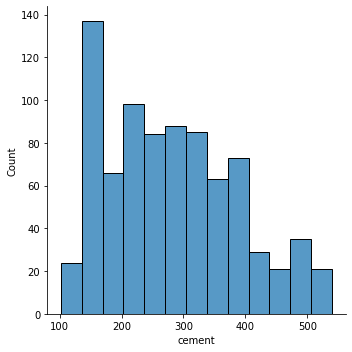

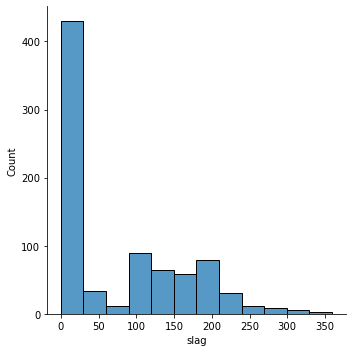

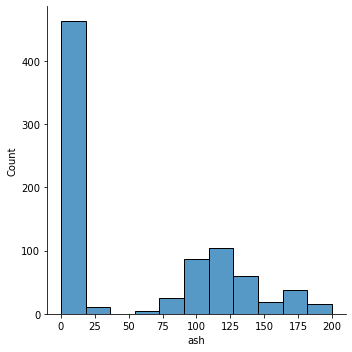

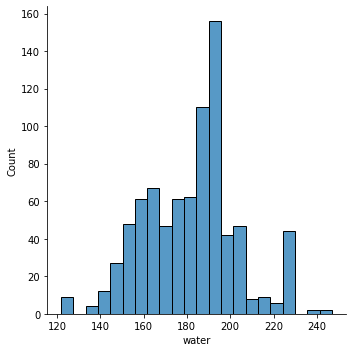

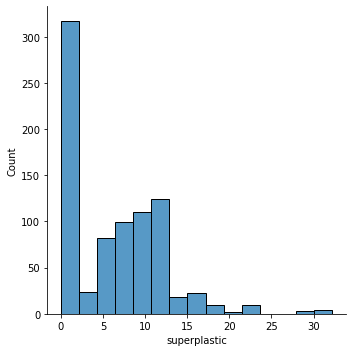

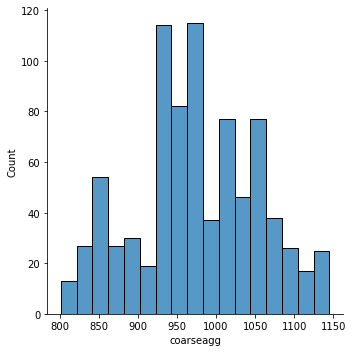

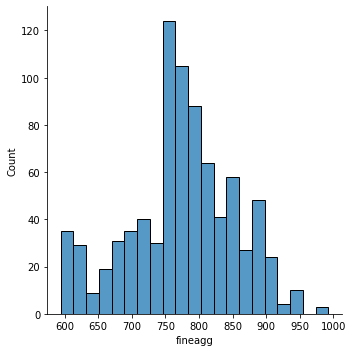

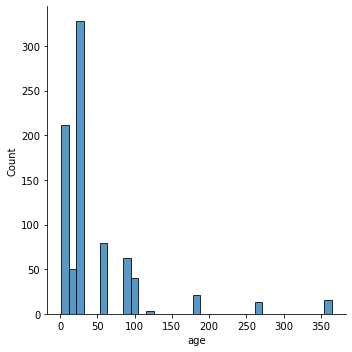

In [41]:
for i in X_train.columns:

    sns.displot(X_train[i])
   


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
lr.score(X_test,y_test)

0.6009452311988334

In [47]:
## applying box-cox transformation

In [48]:
bcx= PowerTransformer(method='box-cox')

In [49]:
X_train_bcx=bcx.fit_transform(X_train+0.0000001)

X_test_bcx=bcx.transform(X_test+0.0000001)

In [51]:
lr.fit(X_train_bcx, y_train)

LinearRegression()

In [52]:
lr.score(X_test_bcx, y_test)

0.7845721842048218

In [53]:
## applying Yeo-Johnson transformation

In [55]:
yjon=PowerTransformer()

In [56]:
X_train_yjon=yjon.fit_transform(X_train)

X_test_yjon=yjon.transform(X_test)

In [57]:
lr.fit(X_train_yjon, y_train)

LinearRegression()

In [58]:
lr.score(X_test_yjon, y_test)

0.7827632452544075